In [6]:
import os
from pathlib import Path
import sys

if "__project_dir__" not in globals():
    __project_dir__ = Path.cwd().parents[1].resolve()

sys.path.append(__project_dir__)
os.chdir(__project_dir__)

In [7]:
import numpy as np
from src.model_analyser import ModelAnalyser
from src.model import tcr_metric, tcr_representation_model

In [8]:
analyser = ModelAnalyser()
model = tcr_representation_model.load_sceptr_save(Path("/home/yutanagano/UCLOneDrive/MBPhD/projects/tcr_embedder/model_saves/AB_SCEPTR_finetuned"))
# model.distance_bins = np.linspace(0, 0.8, num=21)

In [9]:
# model = tcr_metric.Tcrdist()

Running OneVsRest...


100%|██████████| 15/15 [00:01<00:00, 13.51it/s]


Running OneVsBackground...


100%|██████████| 15/15 [00:03<00:00,  4.79it/s]


Running EpitopeRanking...


100%|██████████| 15/15 [00:00<00:00, 391.18it/s]


Running CospecificityAnalysis...


/home/yutanagano/Projects/tcr_embedder/.venv/lib64/python3.11/site-packages/torch/nn/modules/transformer.py:296: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:177.)
  output = torch._nested_tensor_from_mask(output, src_key_padding_mask.logical_not(), mask_check=False)


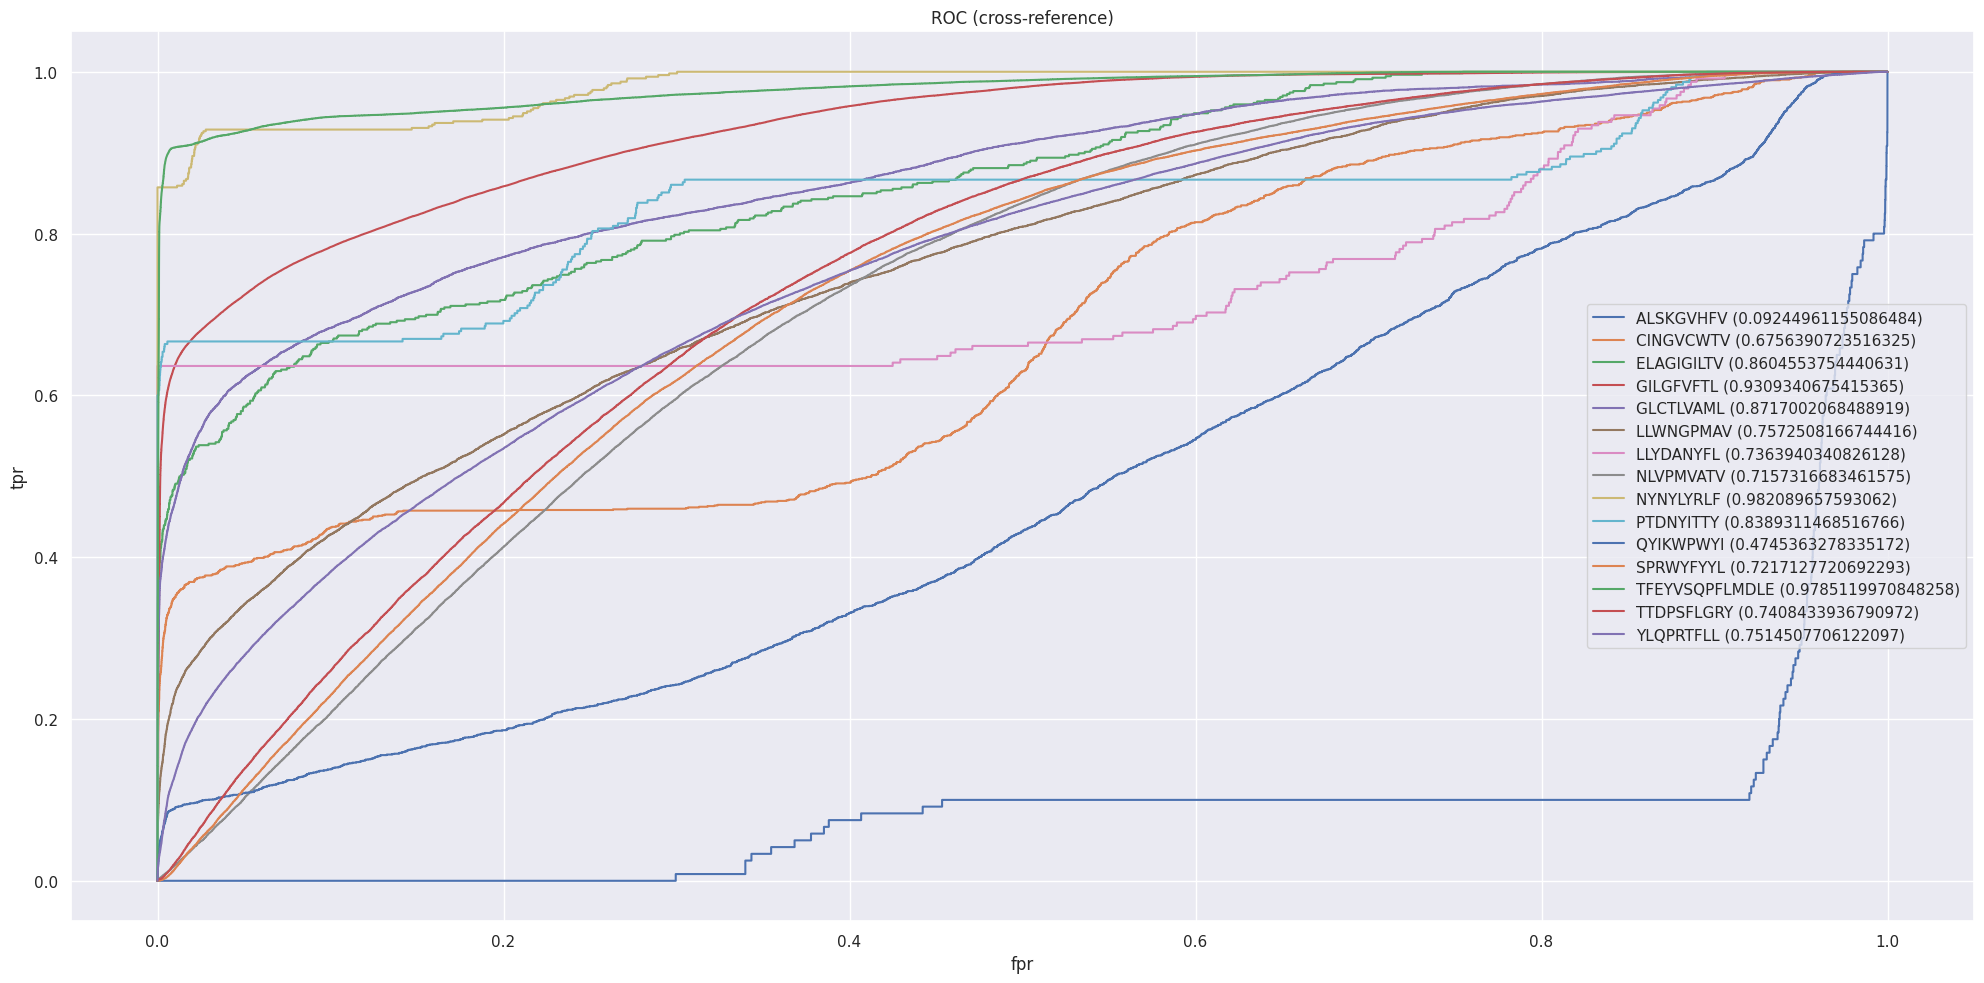

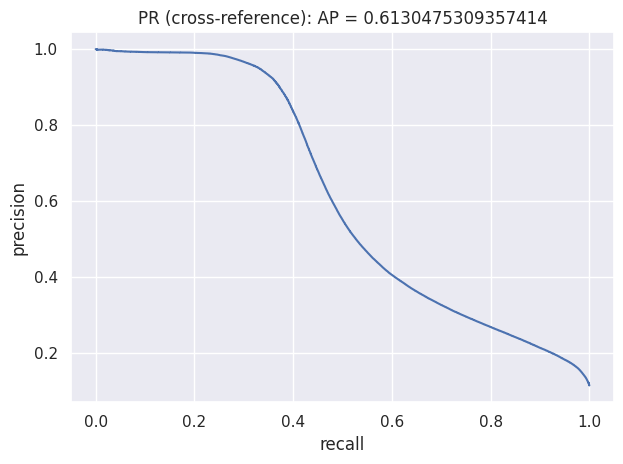

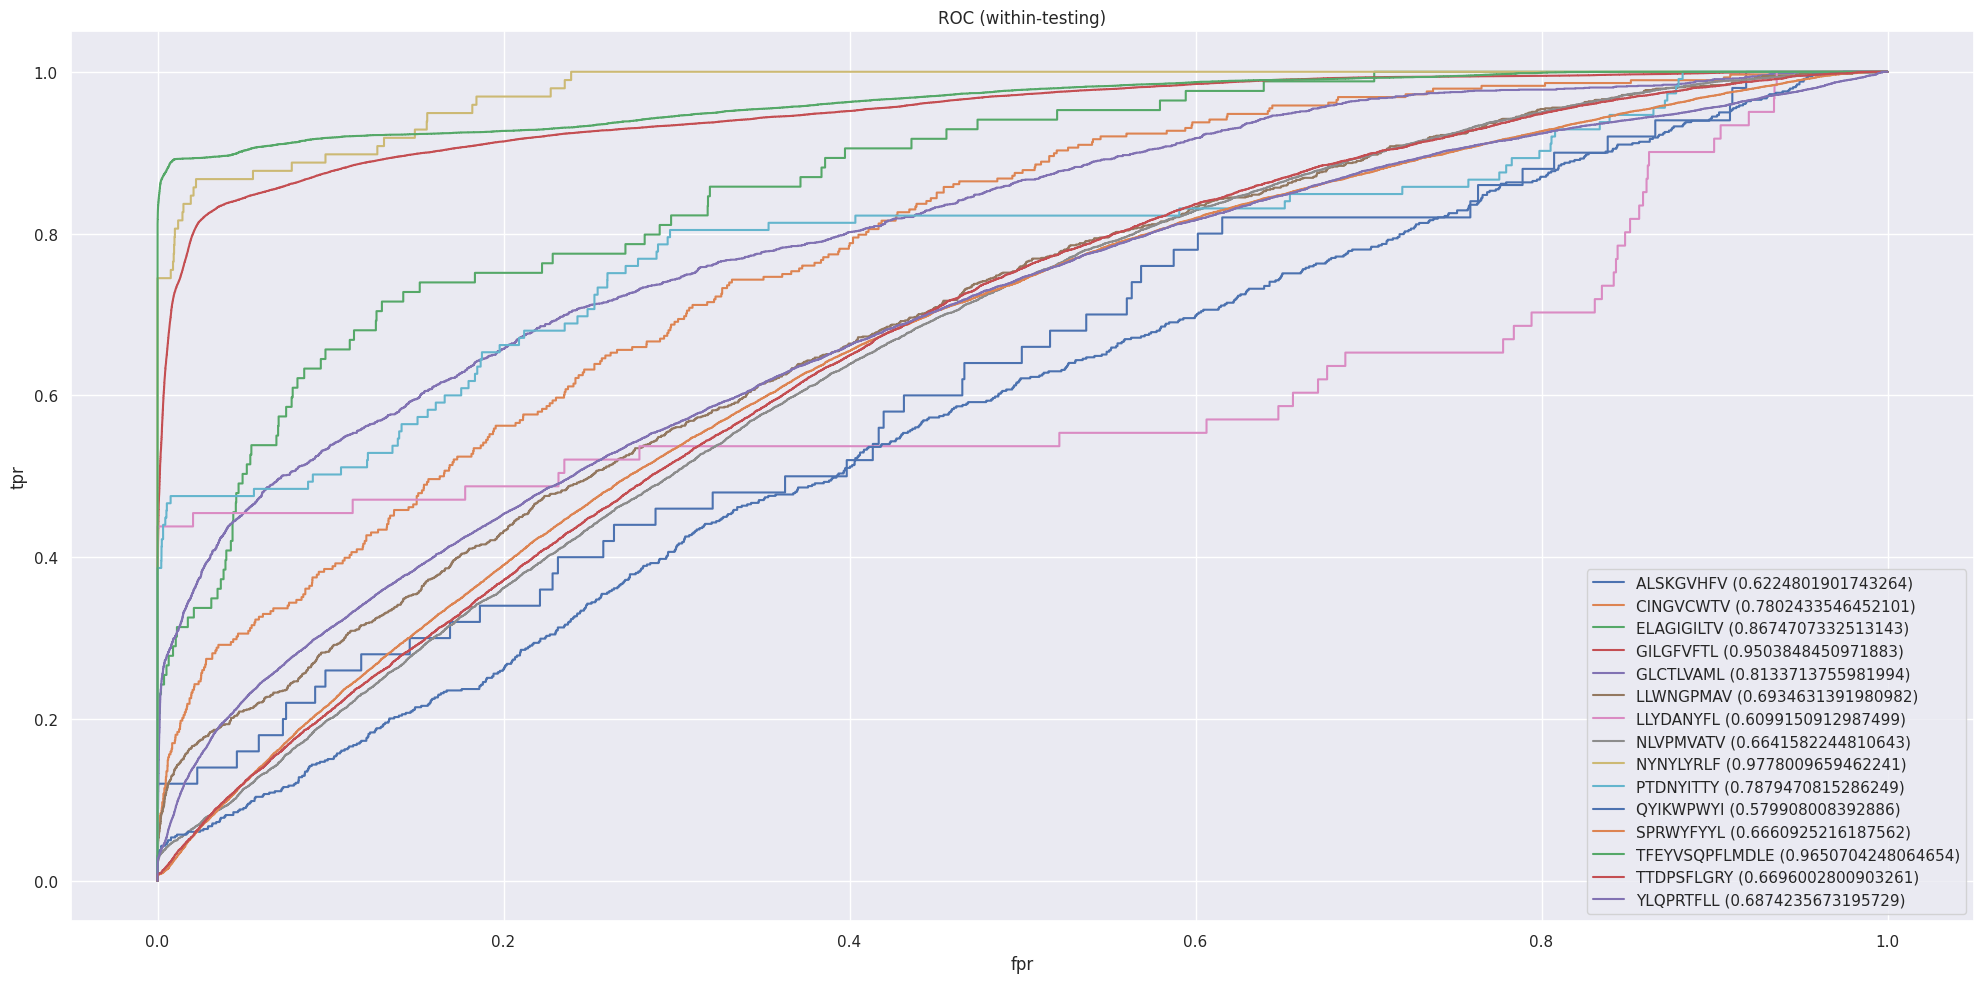

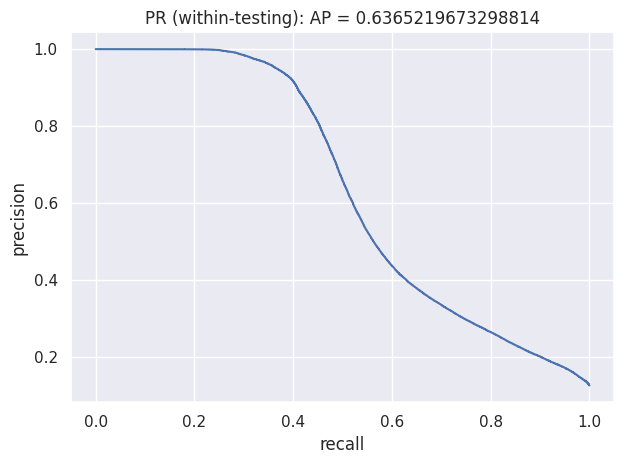

In [10]:
analyser.analyse(model)